In [41]:
import gensim
import os
import nltk
import pandas as pd
import plotly.express as px
from sklearn.decomposition import PCA
from sklearn.metrics.pairwise import cosine_similarity
from scipy.cluster.hierarchy import linkage, dendrogram
import matplotlib.pyplot as plt

In [42]:
"This is a sentence. And this is a second sentence"
[["This", "is", "a", "sentence"],
 ["And", "this", "is", "a", "second", "sentence"]]

[['This', 'is', 'a', 'sentence'],
 ['And', 'this', 'is', 'a', 'second', 'sentence']]

In [43]:
texts = []

for root, dirs, files in os.walk('corpus'):
    for f in files:
        if f[0] != ".":
            with open(os.path.join(root, f), 'r', encoding='utf8') as rf:
                text = rf.read()
                
                text = text.lower()
                sentences = [nltk.word_tokenize(sent) for 
                             sent in nltk.sent_tokenize(text)]
                
                texts.extend(sentences)
                

In [44]:
vec_model = gensim.models.Word2Vec(sentences=texts, 
                                   vector_size=100, 
                                   window=5, 
                                   sg=0)


In [45]:
word_vectors = vec_model.wv


In [46]:

words = []
vecs = []

for word in vec_model.wv.index_to_key:
    words.append(word)
    vecs.append(vec_model.wv[word])
    
pca = PCA()

my_pca = pca.fit_transform(vecs)

data = {"words":words, "pc1":my_pca[:,0], 'pc2':my_pca[:,1]}
df = pd.DataFrame(data)

fig = px.scatter(df, x="pc1", y="pc2", text="words")
fig.show()

{'icoord': [[5.0, 5.0, 15.0, 15.0],
  [45.0, 45.0, 55.0, 55.0],
  [35.0, 35.0, 50.0, 50.0],
  [25.0, 25.0, 42.5, 42.5],
  [75.0, 75.0, 85.0, 85.0],
  [65.0, 65.0, 80.0, 80.0],
  [33.75, 33.75, 72.5, 72.5],
  [10.0, 10.0, 53.125, 53.125],
  [115.0, 115.0, 125.0, 125.0],
  [105.0, 105.0, 120.0, 120.0],
  [95.0, 95.0, 112.5, 112.5],
  [135.0, 135.0, 145.0, 145.0],
  [155.0, 155.0, 165.0, 165.0],
  [140.0, 140.0, 160.0, 160.0],
  [103.75, 103.75, 150.0, 150.0],
  [31.5625, 31.5625, 126.875, 126.875],
  [175.0, 175.0, 185.0, 185.0],
  [195.0, 195.0, 205.0, 205.0],
  [215.0, 215.0, 225.0, 225.0],
  [200.0, 200.0, 220.0, 220.0],
  [180.0, 180.0, 210.0, 210.0],
  [245.0, 245.0, 255.0, 255.0],
  [235.0, 235.0, 250.0, 250.0],
  [265.0, 265.0, 275.0, 275.0],
  [285.0, 285.0, 295.0, 295.0],
  [270.0, 270.0, 290.0, 290.0],
  [242.5, 242.5, 280.0, 280.0],
  [195.0, 195.0, 261.25, 261.25],
  [305.0, 305.0, 315.0, 315.0],
  [335.0, 335.0, 345.0, 345.0],
  [325.0, 325.0, 340.0, 340.0],
  [310.0, 310.0,

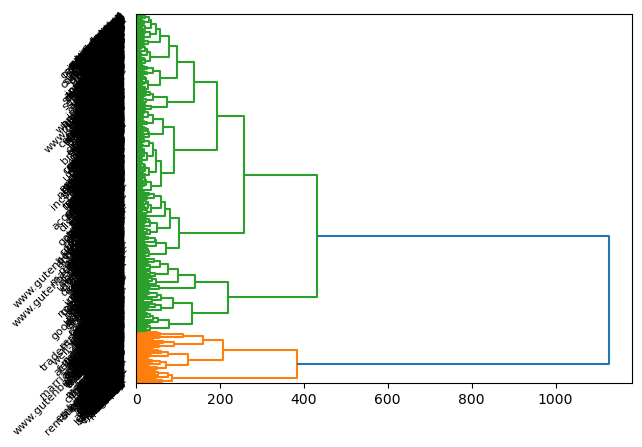

In [48]:
similarties = cosine_similarity(vecs)


linkages = linkage(similarties, 'ward')

dendrogram(linkages, 
           labels=words, 
           orientation='right', 
           leaf_font_size=8, 
           leaf_rotation=45)


In [50]:
%matplotlib inline  
plt.show()
